In [1]:
# Trick to autoreload modules automatically for development
%load_ext autoreload
%autoreload 2

In [4]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
from iminuit import minimize

from combined_fit import spectrum as sp
from combined_fit import minimizer as minim
from combined_fit import tensor as ts
from combined_fit import mass
from combined_fit import constant
from combined_fit import xmax_distr
from combined_fit import draw

In [5]:
    #Initial guess
    init_E_times_k = [2.5e45,1.8e46,1.8e46,2.5e45,0]
    init_Rcut, init_gamma =  18.1, -2
    init_E_times_k = np.transpose(init_E_times_k)
    #Boundaries
    bnds_E_times_k = [[1.e45, 1.e47]]*len(ts.A) # Boundaries E_times_k
    bnds_Rcut_gamma = ( (18, 19), (-3, 0)) # Boundaries Rcut & gamma


In [14]:
model = "EPOS-LHC" #"Sibyll" or "EPOS-LHC"
E_th = 18.85 # Compute the deviance from the 4th spectrum points (& equivalent energy for lnA)
    

In [15]:
    #Distribution of Sources
    SFRd = ts.Load_evol() # SFRd distribution of sources
    flat = lambda z: SFRd(1) #Flat distribution of sources
    S_z =  SFRd # Can be changed to:  flat


In [16]:
t_EJ = sp.load_Spectrum_Data()
t_lnA = mass.load_lnA_Data(model)
t_Xmax = mass.load_Xmax_data() # load Xmax

In [17]:
#Loading spectrum, compo, tensor, evolution of sources
Tensor=[]
Tensor = ts.upload_Tensor()


In [20]:
    #---------- initializing the xmax distribution ------------------
    xmax,exp_distributions = xmax_distr.set_Xmax_distr()
    arr_reduced, exp_distribution_reduced = [], []
    A_tot = np.arange(1,(ts.A[-1]+1))
    dx = 20

    for i in range(len(xmax['meanlgE'])):
        min = int(xmax['xMin'][i]/dx)
        max = int(xmax['xMax'][i]/dx)
        arr_reduced.append(np.arange(xmax['xMin'][i], xmax['xMax'][i], dx)+(dx/2))
        exp_distribution_reduced.append(exp_distributions[i][min:max])

    convoluted_gumbel = xmax_distr.Convolve_all(xmax,A_tot, arr_reduced, model)
    #---------- ------------------------------- ------------------


In [24]:
    StartingFit = np.asscalar(np.argwhere(t_EJ['logE'] == E_th))
    print("Starting the fit from logE = ", t_EJ['logE'][StartingFit])
    #mini = minim.Minimize_Spectrum_And_Compo # For minimizing spectrum and lnA deviance
    #mini = minim.Minimize_Spectrum_And_Xmax # For minimizing spectrum and Xmax moments deviance
    mini = minim.Minimize_Spectrum_And_Distribution # For minimizing spectrum and Xmax distr deviance

Starting the fit from logE =  18.85


<ipython-input-24-7d86b08d73de>:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  StartingFit = np.asscalar(np.argwhere(t_EJ['logE'] == E_th))


In [26]:
    #Do the minimization
    bnds = np.concatenate((bnds_E_times_k, bnds_Rcut_gamma))
    #print(np.shape([init_E_times_k]))
    parameters = np.concatenate(([init_E_times_k[0],init_E_times_k[1],init_E_times_k[2],init_E_times_k[3],init_E_times_k[4]], [init_Rcut, init_gamma]))
    #args = [[Tensor, ts.A, ts.Z, t_EJ, t_Xmax, E_th,model, S_z]] # fit Xmax moments
    #args = [[Tensor, ts.A, ts.Z, t_EJ, t_lnA, E_th,model, S_z]] # fit lnA
    args = [[Tensor, ts.A, ts.Z, t_EJ, xmax, E_th,arr_reduced,exp_distribution_reduced,convoluted_gumbel, S_z]] # fit Xmax distr
    res = minimize(mini, parameters, tol=1e-5, options={'maxfev': 10000, 'disp': False, 'stra': 1}, bounds=bnds, args=args) # change disp to True if you want to increase the verbosity of the minimizer


Spectrum deviance:  860.84  | Composition deviance:  240.28
Spectrum deviance:  860.9  | Composition deviance:  240.27
Spectrum deviance:  860.78  | Composition deviance:  240.28
Spectrum deviance:  861.2  | Composition deviance:  240.27
Spectrum deviance:  860.48  | Composition deviance:  240.29
Spectrum deviance:  862.01  | Composition deviance:  240.26
Spectrum deviance:  859.67  | Composition deviance:  240.29
Spectrum deviance:  861.7  | Composition deviance:  240.27
Spectrum deviance:  859.98  | Composition deviance:  240.29
Spectrum deviance:  862.01  | Composition deviance:  240.28
Spectrum deviance:  859.67  | Composition deviance:  240.27
Spectrum deviance:  861.56  | Composition deviance:  240.28
Spectrum deviance:  860.12  | Composition deviance:  240.27
Spectrum deviance:  861.01  | Composition deviance:  240.28
Spectrum deviance:  860.67  | Composition deviance:  240.27
Spectrum deviance:  861.3  | Composition deviance:  240.29
Spectrum deviance:  860.38  | Composition de

Spectrum deviance:  20.99  | Composition deviance:  184.38
Spectrum deviance:  20.97  | Composition deviance:  184.38
Spectrum deviance:  20.99  | Composition deviance:  184.39
Spectrum deviance:  20.96  | Composition deviance:  184.38
Spectrum deviance:  20.98  | Composition deviance:  184.38
Spectrum deviance:  20.98  | Composition deviance:  184.38
Spectrum deviance:  20.96  | Composition deviance:  184.38
Spectrum deviance:  20.99  | Composition deviance:  184.39
Spectrum deviance:  20.99  | Composition deviance:  184.39
Spectrum deviance:  20.97  | Composition deviance:  184.38
Spectrum deviance:  19.34  | Composition deviance:  184.34
Spectrum deviance:  18.98  | Composition deviance:  184.32
Spectrum deviance:  18.98  | Composition deviance:  184.32
Spectrum deviance:  18.98  | Composition deviance:  184.32
Spectrum deviance:  18.98  | Composition deviance:  184.32
Spectrum deviance:  18.98  | Composition deviance:  184.32
Spectrum deviance:  18.98  | Composition deviance:  184.

Spectrum deviance:  21.61  | Composition deviance:  174.9
Spectrum deviance:  21.62  | Composition deviance:  174.89
Spectrum deviance:  21.62  | Composition deviance:  174.89
Spectrum deviance:  21.61  | Composition deviance:  174.89
Spectrum deviance:  21.62  | Composition deviance:  174.89
Spectrum deviance:  21.61  | Composition deviance:  174.89
Spectrum deviance:  21.61  | Composition deviance:  174.9
Spectrum deviance:  21.62  | Composition deviance:  174.89
Spectrum deviance:  21.62  | Composition deviance:  174.89
Spectrum deviance:  21.61  | Composition deviance:  174.9
Spectrum deviance:  21.62  | Composition deviance:  174.89
Spectrum deviance:  21.6  | Composition deviance:  174.9
Spectrum deviance:  21.61  | Composition deviance:  174.89
Spectrum deviance:  21.62  | Composition deviance:  174.89
Spectrum deviance:  21.62  | Composition deviance:  174.89
Spectrum deviance:  21.61  | Composition deviance:  174.89
Spectrum deviance:  21.18  | Composition deviance:  174.94
Sp

Spectrum deviance:  19.39  | Composition deviance:  175.44
Spectrum deviance:  19.38  | Composition deviance:  175.46
Spectrum deviance:  19.38  | Composition deviance:  175.45
Spectrum deviance:  19.38  | Composition deviance:  175.45
Spectrum deviance:  19.38  | Composition deviance:  175.45
Spectrum deviance:  19.38  | Composition deviance:  175.45
Spectrum deviance:  18.62  | Composition deviance:  176.0
Spectrum deviance:  18.65  | Composition deviance:  175.96
Spectrum deviance:  18.69  | Composition deviance:  175.92
Spectrum deviance:  18.7  | Composition deviance:  175.92
Spectrum deviance:  18.69  | Composition deviance:  175.92
Spectrum deviance:  18.7  | Composition deviance:  175.92
Spectrum deviance:  18.69  | Composition deviance:  175.92
Spectrum deviance:  18.7  | Composition deviance:  175.92
Spectrum deviance:  18.69  | Composition deviance:  175.92
Spectrum deviance:  18.69  | Composition deviance:  175.92
Spectrum deviance:  18.7  | Composition deviance:  175.91
Sp

Spectrum deviance:  18.68  | Composition deviance:  175.83
Spectrum deviance:  18.68  | Composition deviance:  175.82
Spectrum deviance:  18.68  | Composition deviance:  175.82
Spectrum deviance:  18.7  | Composition deviance:  175.8
Spectrum deviance:  18.72  | Composition deviance:  175.78
Spectrum deviance:  18.72  | Composition deviance:  175.78
Spectrum deviance:  18.72  | Composition deviance:  175.78
Spectrum deviance:  18.72  | Composition deviance:  175.78
Spectrum deviance:  18.72  | Composition deviance:  175.78
Spectrum deviance:  18.72  | Composition deviance:  175.78
Spectrum deviance:  18.72  | Composition deviance:  175.78
Spectrum deviance:  18.72  | Composition deviance:  175.78
Spectrum deviance:  18.72  | Composition deviance:  175.78
Spectrum deviance:  18.72  | Composition deviance:  175.78
Spectrum deviance:  18.72  | Composition deviance:  175.78
Spectrum deviance:  18.72  | Composition deviance:  175.78
Spectrum deviance:  18.72  | Composition deviance:  175.78

Spectrum deviance:  18.67  | Composition deviance:  175.83
Spectrum deviance:  18.67  | Composition deviance:  175.83


In [28]:
    err = []
    E_times_k = res.x[:len(ts.A)]

    logRcut = res.x[len(ts.A)]
    err_Rcut = np.sqrt(res.hess_inv[len(ts.A)][len(ts.A)])

    gamma = res.x[len(ts.A)+1]
    err_gamma = np.sqrt(res.hess_inv[len(ts.A)+1][len(ts.A)+1])
    for i in range (len(ts.A)):
        err.append(np.sqrt(res.hess_inv[i][i]))
    print("\n\n\n\nResult of the fit:\n")
    print( "----------------------------------------------\n")
    print(" Spectral parameters \n")
    print("----------------------------------------------\n")
    print("gamma:  ", np.around(gamma, decimals = 2), " +/- ", np.around(err_gamma, decimals = 2))
    print("log(Rcut/V):  ", np.around(logRcut, decimals = 2)," +/- ", np.around(err_Rcut, decimals = 2) )
    for i in range (len(ts.A)):
        print(constant.Masses[i]," (%) :  ",np.around(E_times_k[i]/np.sum(E_times_k), decimals = 2)," +/- " , np.around(err[i]/np.sum(E_times_k), decimals = 2), " * ", np.sum(E_times_k), "erg per solar mass" )
    #res.minuit.minos()
    #res.minuit.draw_mnprofile('x6')
    print(res.minuit)
    print("\n\n\n\n Correlation Matrix: \n")
    corr_matrix = np.zeros((len(ts.A)+2,len(ts.A)+2))

    for i in range (len(ts.A)+2):
        for j in range (len(ts.A)+2):
            corr_matrix[i][j] = np.around(res.hess_inv[i][j]/np.sqrt(res.hess_inv[i][i]*res.hess_inv[j][j]), decimals = 3)
    print(corr_matrix)






Result of the fit:

----------------------------------------------

 Spectral parameters 

----------------------------------------------

gamma:   -1.82  +/-  0.19
log(Rcut/V):   18.27  +/-  0.03
H  (%) :   0.03  +/-  0.02  *  4.621743446501319e+46 erg per solar mass
He  (%) :   0.4  +/-  0.02  *  4.621743446501319e+46 erg per solar mass
N  (%) :   0.5  +/-  0.02  *  4.621743446501319e+46 erg per solar mass
Si  (%) :   0.04  +/-  0.01  *  4.621743446501319e+46 erg per solar mass
Fe  (%) :   0.02  +/-  0.0  *  4.621743446501319e+46 erg per solar mass
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 194.5                      │              Nfcn = 700              │
│ EDM = 3.74e-09 (Goal: 1e-08)     │                                      │
├──────────────────────────────────┼───────────────────────

In [29]:
    w_R = lambda ZA, logR: sp.Spectrum_Energy(ZA, logR, gamma, logRcut)
    w_zR = lambda ZA, z, logR: w_R(ZA, logR)/sp.dzdt(z)*S_z(z)


Composition deviance, from logE= 18.85 :  30.694738529704384  ( 19 )


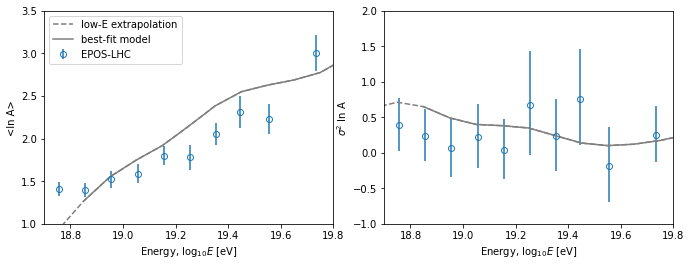

In [30]:
    mass.Plot_fractions(Tensor, E_times_k, ts.A, ts.Z, w_zR, E_th, model)


Normalization starting at logE= 18.85
Spectrum deviance, from logE= 18.85 :  18.802971843187674  ( 14 )


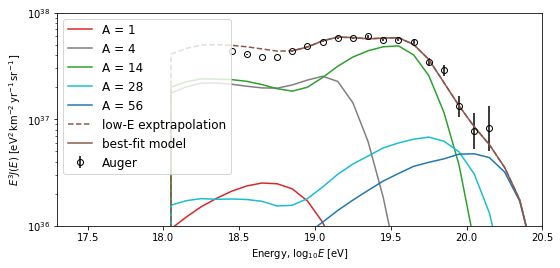

In [31]:
    sp.Plot_spectrum(Tensor, E_times_k, ts.A, ts.Z, w_zR, E_th)

Composition deviance, from logE= 18.85 :  33.114432103403324 ( 16 )


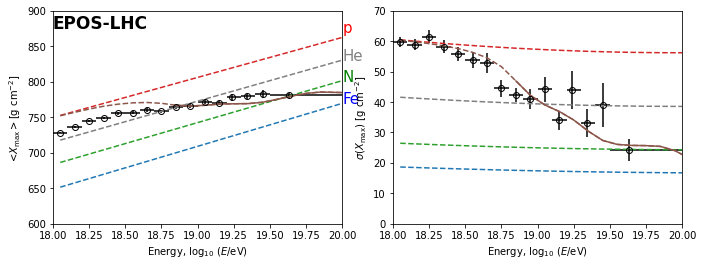

In [32]:
    mass.Plot_Xmax(Tensor,E_times_k,ts.A,ts.Z,w_zR,E_th, model)
